In [407]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse

In [419]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\Alcohol_Sales.csv', index_col='DATE', parse_dates=True)

In [421]:
df.index.freq='MS'

In [423]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [425]:
df.isna().sum()

S4248SM144NCEN    0
dtype: int64

In [427]:
df.shape

(325, 1)

In [429]:
df.columns=['Sales']

<Axes: xlabel='DATE'>

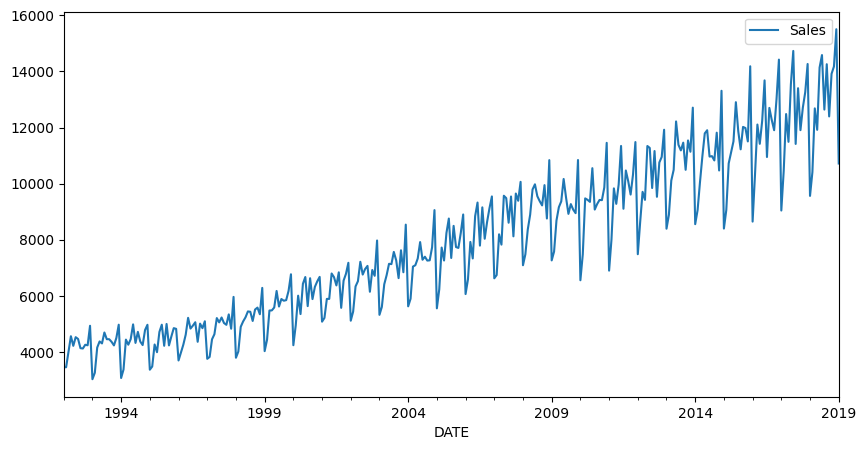

In [431]:
df.plot(figsize=(10,5))

In [433]:
from statsmodels.tsa.seasonal import seasonal_decompose

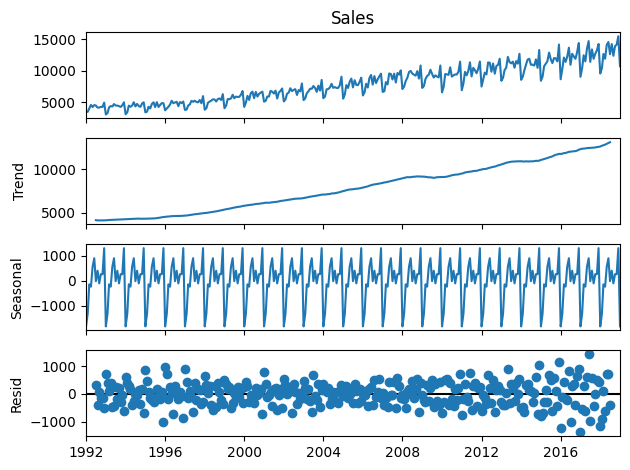

In [435]:
results = seasonal_decompose(df['Sales'])
results.plot();

<Axes: xlabel='DATE'>

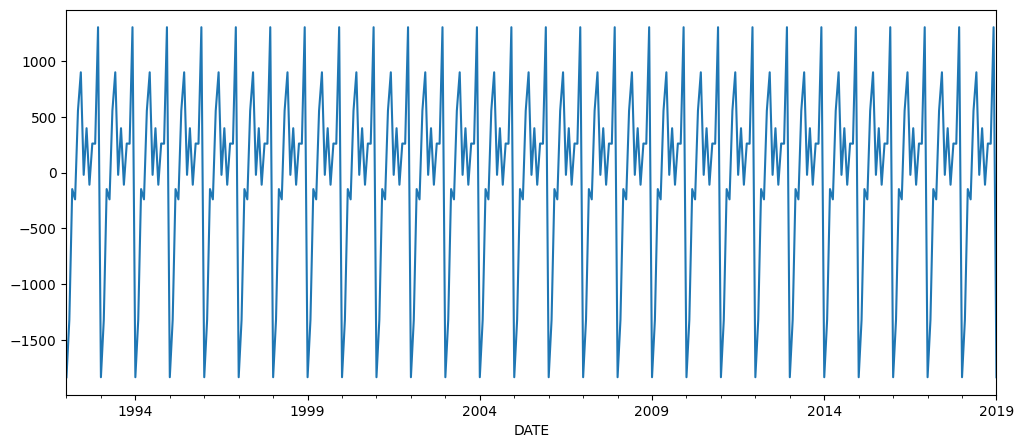

In [436]:
results.seasonal.plot(figsize=(12,5))

## Forecast of 12 months in the future so test=12

## Train test split

In [441]:
len(df)

325

In [443]:
325-12

313

In [445]:
train=df.iloc[:313]
test=df.iloc[313:]

## Normalisation

MinMaxScaler est souvent meilleur pour les RNN/LSTM car :

Il évite les valeurs trop grandes ou négatives.

Il est plus adapté aux fonctions d'activation comme sigmoid et tanh.

Il fonctionne bien avec des données non gaussiennes, comme c'est souvent le cas en séries temporelles.

In [449]:
from sklearn.preprocessing import MinMaxScaler

In [451]:
scaler = MinMaxScaler()

In [453]:
scaler.fit(train)

MinMaxScaler()

In [455]:
scaled_train = scaler.transform(train)

In [457]:
scaled_test = scaler.transform(test)

## Convert data to time sequences

les RNN(LSTM,GRU...) ont besoin d'entrées sous forme de séquence 

In [461]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [463]:
n_input = 3 # Nombre de pas de temps dans chaque séquence, regarde les 2 dernières valeurs pour prédire la suivante.regarde les 2 dernières valeurs pour prédire la suivante.
n_features = 1 # Nombre de variables

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [465]:
len(scaled_train)

313

In [467]:
len(generator)   # len(scaled_train) - n_input

310

In [469]:
generator[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855]]]),
 array([[0.13103684]]))

In [471]:
X, y  = generator[0]

In [473]:
X

array([[[0.03658432],
        [0.03649885],
        [0.08299855]]])

In [475]:
y

array([[0.13103684]])

In [477]:
X.shape   # (batch,ligne,colonne)

(1, 3, 1)

In [479]:
y.shape

(1, 1)

# Model

In [482]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [484]:
n_input = 12 # Si on observe une saisonnalité tous les mois sur 1 année, on définit n_input à 12
n_features=1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [486]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [488]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [490]:
model.fit(train_generator,epochs=25)

Epoch 1/25


C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0360    
Epoch 2/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 
Epoch 3/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0088     
Epoch 4/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064 
Epoch 5/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0057 
Epoch 6/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0039     
Epoch 7/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 
Epoch 8/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031 
Epoch 9/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020     
Epoch 10/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019     
Epoch 11/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 
Epoch 12/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020     
Epoch 13/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019     
Epoch 14/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 
Epoch 15/25
301/301 ━━━━━━━

In [491]:
model.history.history.keys()

dict_keys(['loss'])

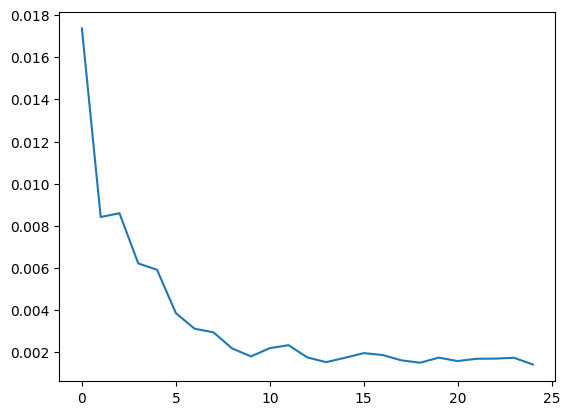

In [492]:
myloss =  model.history.history['loss']
plt.plot(range(len(myloss)), myloss)

12 history steps ---> step 13

last 12 points train ---> pt 1 of test data

In [494]:
first_eval_batch = scaled_train[-12:]  # last 12 points train

In [495]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))   # (batch,ligne,colonne)

In [496]:
first_eval_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [497]:
model.predict(first_eval_batch)  # Prediction of first point of test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[0.7306787]], dtype=float32)

In [498]:
model.predict(first_eval_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([0.7306787], dtype=float32)

In [499]:
model.predict(first_eval_batch)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


0.7306787

# Forecast unsing RNN Model

In [501]:
test_predictions =[]

# Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN (same format of TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):    # Replace len(test) if I want more months of forecast

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred)

    # UPDATE curreznt batch ton include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


current_batch[:,1:,:] -> supprime la première ligne de current_batch

np.append(current_batch[:,1:,:],[[current_pred]] -> ajoute la current_pred aux 11 lignes pour en faire 12. On  rajoute [[ ]] car current_pred a [ ] et current_batch a [[[ ]]]

axis=1 -> Le fortmat de current_batch est (1,12,1) et on veut que le rajou se fasse au deuxième chiffre donc 12

In [503]:
test_predictions

[array([0.7306787], dtype=float32),
 array([0.85822904], dtype=float32),
 array([0.8064319], dtype=float32),
 array([0.9778716], dtype=float32),
 array([1.0528973], dtype=float32),
 array([0.79470384], dtype=float32),
 array([0.95106274], dtype=float32),
 array([0.82091576], dtype=float32),
 array([0.9001515], dtype=float32),
 array([0.9442602], dtype=float32),
 array([1.0170748], dtype=float32),
 array([0.64066184], dtype=float32)]

In [504]:
true_predictions = scaler.inverse_transform(test_predictions)

In [505]:
true_predictions

array([[11579.20984876],
       [13071.42155182],
       [12465.44667566],
       [14471.11981112],
       [15348.84591162],
       [12328.24023831],
       [14157.48298234],
       [12634.89345998],
       [13561.87229514],
       [14077.89984578],
       [14929.75835872],
       [10526.10281551]])

In [506]:
test['Predictions'] = true_predictions

C:\Users\nico_\AppData\Local\Temp\ipykernel_23572\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [507]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11579.209849
2018-03-01,12683,13071.421552
2018-04-01,11919,12465.446676
2018-05-01,14138,14471.119811
2018-06-01,14583,15348.845912
2018-07-01,12640,12328.240238
2018-08-01,14257,14157.482982
2018-09-01,12396,12634.893460
2018-10-01,13914,13561.872295


<Axes: xlabel='DATE'>

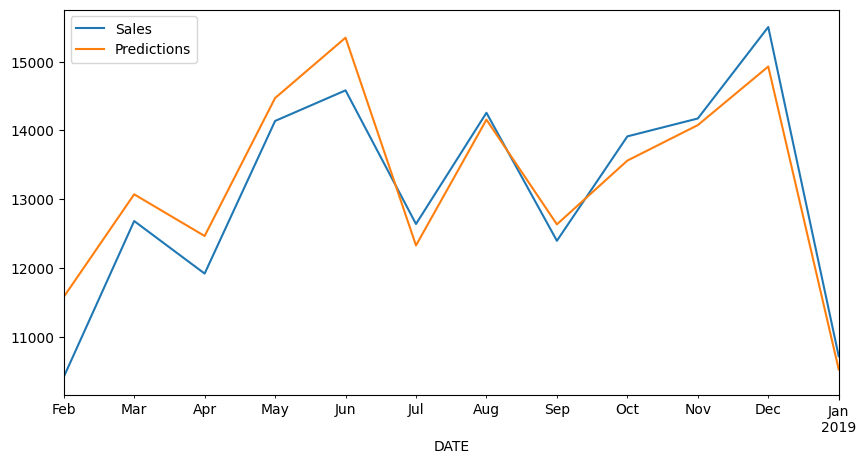

In [508]:
test.plot(figsize=(10,5))

In [509]:
from statsmodels.tools.eval_measures import rmse

In [510]:
rmse(test['Sales'],test['Predictions'])

513.6733426444653

In [529]:
test['Sales'].mean()

13111.75

In [531]:
rmse(test['Sales'],test['Predictions']) * 100 / test['Sales'].mean()

3.9176566258849146

Error of 3.92% to the test set

In [535]:
model.save('modelRNN.keras')
#model.save('modelRNN.h5')

In [537]:
from keras.models import load_model

In [539]:
new_model = load_model('modelRNN.keras')